# Temp

Temporary file for testing new functions.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import re
import pickle
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_rows', 10)
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
plt.rcParams['figure.figsize'] = [12, 4]

import quandl

from utils import *

In [54]:
from trading_strategies import *
test_RS_Trading_Strategy()

In [4]:
from temp import *
price = pd.read_csv(filepath_or_buffer='test/Seykota GC----C.csv', header=None,
           names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Interest'], 
           index_col=0)

price.index = [datetime.strptime(str(i), '%Y%m%d') for i in price.index.values]

rs_tr = RS_Trading_Strategy(price, equity=1e6, position_step=1e2,
                            days_fast=20, days_slow=140,
                            name='Comex Gold')
rs_tr.excecute(warmup=20)

# test states
stts = rs_tr.get_state()
metrics = pd.merge(price[['Open', 'High', 'Low', 'Close']], stts, left_index=True, right_index=True)
metrics_log = pd.read_excel(io='test/Metrics_Log_1-1.xlsx', index_col=0)
assert np.all(np.equal(metrics_log.values, metrics.values))

# test trades
trds = rs_tr.get_trades()
trade_log = pd.read_excel(io='test/Trade_Log.xlsx').set_index('Date').sort_index()[['Price', 'Amount']]
assert max(abs(trds.Price.values - trade_log.Price.values)) < 1e-3
assert trds.Amount.equals(trade_log.Amount.astype('float64'))

# test equity
eqty = rs_tr.get_equity()
equity_log = pd.read_excel(io='test/Equity_Log.xlsx', index_col=0)
assert max(abs(eqty.Equity.values - equity_log.Equity.values)) < 1e-3
assert np.max(np.abs(equity_log.Clo_Bal - rs_tr.get_equity().Closing_Balance)) < 1e-3
assert np.max(np.abs(equity_log.Open_Profit - rs_tr.get_equity().Open_Profit)) < 1e-3

# test performance indicators
assert np.round(rs_tr.performance['ICAGR'], 4) == 0.0309
assert np.round(rs_tr.performance['Max_Drawdown'], 4) == 0.4077
assert np.round(rs_tr.performance['Bliss'], 4) == 0.0758

In [61]:
from trading_strategies import *
test_RS_Trading_Strategy()
from temp import *

In [62]:
es1 = ES1_Trading_Strategy(price, equity=1e6, position_step=1e2,
                           a=1e-2,
                           name='Comex Gold')

In [63]:
es1.excecute()

/Users/juanpabloacosta/GitHub/trend-following/trading_strategies.py:291: RuntimeWarning: invalid value encountered in log
  self.performance['ICAGR'] = numpy.log(self.performance['Ratio']) / self.performance['Years']
/Users/juanpabloacosta/GitHub/trend-following/trading_strategies.py:297: RuntimeWarning: invalid value encountered in log
  self.performance['Volatility'] = numpy.std(numpy.log(eqty[1:] / eqty[:-1])) * numpy.sqrt(364.25)


In [64]:
es1.performance

{'Years': 30.72614962251201,
 'Ratio': -0.00015087959923132803,
 'ICAGR': nan,
 'Max_Drawdown': 1.000004230704519,
 'Bliss': nan,
 'Volatility': nan,
 'Lake_Ratio': 40.10188987567859,
 'Sea_Ratio': -116.22230082874987}

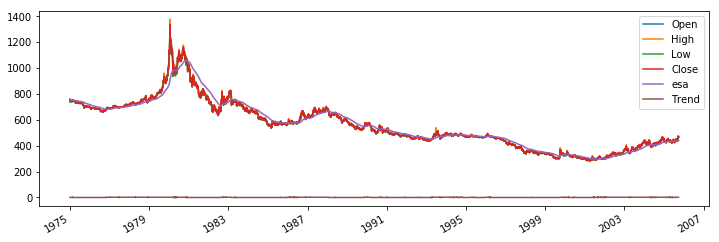

In [65]:
es1.plot_state()

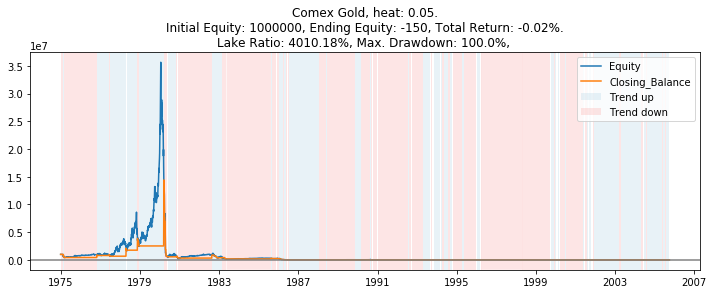

In [66]:
es1.plot_equity()

In [47]:
np.isnan(np.nan) * 1

1